In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

pip install tensorflow

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.56.2 requires protobuf>=4.21.6, but you have protobuf 3.19.6 which is incompatible.

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints


# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub



import re
import nltk
from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

#Metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
restaurant_df = pd.read_csv("/content/drive/MyDrive/ABSA work/codes/processed_ASTE-Data-V2/16res_train_original.csv")

In [ ]:
restaurant_df

,text,aspect,opinion,sentiment
0,Judging from previous posts this used to be a ...,['place'],['good'],['NEG']
1,"We , there were four of us , arrived at noon -...",['staff'],['rude'],['NEG']
2,The food was lousy - too sweet or too salty an...,"['food', 'food', 'food', 'portions']","['lousy', 'too sweet', 'too salty', 'tiny']","['NEG', 'NEG', 'NEG', 'NEG']"
3,Avoid this place !,['place'],['Avoid'],['NEG']
4,"I have eaten at Saul , many times , the food i...",['food'],['good'],['POS']
...,...,...,...,...
852,bad staff,['staff'],['bad'],['NEG']
853,I generally like this place .,['place'],['like'],['POS']
854,The food is good .,['food'],['good'],['POS']
855,The design of the space is good .,['space'],['good'],['POS']


In [ ]:

df = restaurant_df.drop('opinion', axis=1)


In [ ]:

df

,text,aspect,sentiment
0,Judging from previous posts this used to be a ...,['place'],['NEG']
1,"We , there were four of us , arrived at noon -...",['staff'],['NEG']
2,The food was lousy - too sweet or too salty an...,"['food', 'food', 'food', 'portions']","['NEG', 'NEG', 'NEG', 'NEG']"
3,Avoid this place !,['place'],['NEG']
4,"I have eaten at Saul , many times , the food i...",['food'],['POS']
...,...,...,...
852,bad staff,['staff'],['NEG']
853,I generally like this place .,['place'],['POS']
854,The food is good .,['food'],['POS']
855,The design of the space is good .,['space'],['POS']


In [ ]:


df['hot_enocded'] = pd.NaT

In [ ]:


df['hot_enocded'] = df['hot_enocded'].astype('object')
for i in np.arange(857):
    df.at[i, 'hot_enocded'] =  [3,3,3,3,3]

In [ ]:
df

,text,aspect,sentiment,hot_enocded
0,Judging from previous posts this used to be a ...,['place'],['NEG'],"[3, 3, 3, 3, 3]"
1,"We , there were four of us , arrived at noon -...",['staff'],['NEG'],"[3, 3, 3, 3, 3]"
2,The food was lousy - too sweet or too salty an...,"['food', 'food', 'food', 'portions']","['NEG', 'NEG', 'NEG', 'NEG']","[3, 3, 3, 3, 3]"
3,Avoid this place !,['place'],['NEG'],"[3, 3, 3, 3, 3]"
4,"I have eaten at Saul , many times , the food i...",['food'],['POS'],"[3, 3, 3, 3, 3]"
...,...,...,...,...
852,bad staff,['staff'],['NEG'],"[3, 3, 3, 3, 3]"
853,I generally like this place .,['place'],['POS'],"[3, 3, 3, 3, 3]"
854,The food is good .,['food'],['POS'],"[3, 3, 3, 3, 3]"
855,The design of the space is good .,['space'],['POS'],"[3, 3, 3, 3, 3]"


In [ ]:
# Changing multiple column names at once
df.rename(columns={'text': 'Sentence', 'aspect': 'Aspect_Category' , 'sentiment': 'polarity'}, inplace=True)


In [ ]:
df.head()

,Sentence,Aspect_Category,polarity,hot_enocded
0,Judging from previous posts this used to be a ...,['place'],['NEG'],"[3, 3, 3, 3, 3]"
1,"We , there were four of us , arrived at noon -...",['staff'],['NEG'],"[3, 3, 3, 3, 3]"
2,The food was lousy - too sweet or too salty an...,"['food', 'food', 'food', 'portions']","['NEG', 'NEG', 'NEG', 'NEG']","[3, 3, 3, 3, 3]"
3,Avoid this place !,['place'],['NEG'],"[3, 3, 3, 3, 3]"
4,"I have eaten at Saul , many times , the food i...",['food'],['POS'],"[3, 3, 3, 3, 3]"


In [ ]:

from wordcloud import WordCloud
wordcloud2 = WordCloud().generate(' '.join(df['Sentence'])),

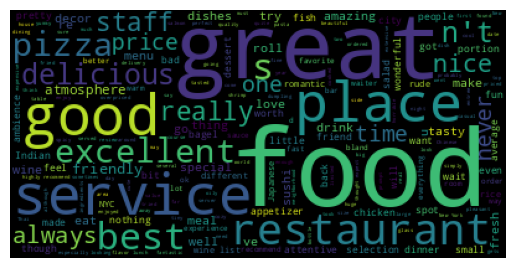

In [ ]:
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:

for i in np.arange(857) :
    for aspect in np.arange(len(df.Aspect_Category[i])):
        if 'service' in df.Aspect_Category[i]:
            if df.polarity[i][df.Aspect_Category[i].index('service')] == 'POS' :
                df.hot_enocded[i][0] = 1
            if df.polarity[i][df.Aspect_Category[i].index('service')] == 'NEG' :
                df.hot_enocded[i][0] = 0
            if df.polarity[i][df.Aspect_Category[i].index('service')] == 'NEU' :
                df.hot_enocded[i][0] = 2
        if 'anecdotes/miscellaneous' in df.Aspect_Category[i]:
            if df.polarity[i][df.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'POS' :
                df.hot_enocded[i][1] = 1
            if df.polarity[i][df.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'NEG' :
                df.hot_enocded[i][1] = 0
            if df.polarity[i][df.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'NEU' :
                df.hot_enocded[i][1] = 2
        if 'food' in df.Aspect_Category[i]:
            if df.polarity[i][df.Aspect_Category[i].index('food')] == 'POS' :
                df.hot_enocded[i][2] = 1
            if df.polarity[i][df.Aspect_Category[i].index('food')] == 'NEG' :
                df.hot_enocded[i][2] = 0
            if df.polarity[i][df.Aspect_Category[i].index('food')] == 'NEU' :
                df.hot_enocded[i][2] = 2
        if 'price' in df.Aspect_Category[i]:
            if df.polarity[i][df.Aspect_Category[i].index('price')] == 'POS' :
                df.hot_enocded[i][3] = 1
            if df.polarity[i][df.Aspect_Category[i].index('price')] == 'NEG' :
                df.hot_enocded[i][3] = 0
            if df.polarity[i][df.Aspect_Category[i].index('price')] == 'NEU' :
                df.hot_enocded[i][3] = 2
        if 'ambience' in df.Aspect_Category[i]:
            if df.polarity[i][df.Aspect_Category[i].index('ambience')] == 'POS' :
                df.hot_enocded[i][4] = 1
            if df.polarity[i][df.Aspect_Category[i].index('ambience')] == 'NEG' :
                df.hot_enocded[i][4] = 0
            if df.polarity[i][df.Aspect_Category[i].index('ambience')] == 'NEU' :
                df.hot_enocded[i][4] = 2

IndexError: ignored

In [ ]:
df.head()

,Sentence,Aspect_Category,polarity,hot_enocded
0,Judging from previous posts this used to be a ...,['place'],['NEG'],"[3, 3, 3, 3, 3]"
1,"We , there were four of us , arrived at noon -...",['staff'],['NEG'],"[3, 3, 3, 3, 3]"
2,The food was lousy - too sweet or too salty an...,"['food', 'food', 'food', 'portions']","['NEG', 'NEG', 'NEG', 'NEG']","[3, 3, 3, 3, 3]"
3,Avoid this place !,['place'],['NEG'],"[3, 3, 3, 3, 3]"
4,"I have eaten at Saul , many times , the food i...",['food'],['POS'],"[3, 3, 3, 3, 3]"
